# Price analysis for real state market in Ciudad de Buenos Aires, Argentina

## El dataset: propiedades en venta en Ciudad de Buenos Aires.

For this project, i'll be working with a sample of data contained in [Properati](www.properati.com.ar) published dataset. Each row represents a property for sale.

## Getting started

* **id**: property id
* **created_on**: date the property was published 
* **operation**: either for rent or sell
* **property_type**: what kind of property we are dealing with (house, apartment, ph, etc.)
* **place_with_parent_names**: Location for the property, set by the publisher
* **lat-lon**: concatenated coordinates
* **lat**: latitude
* **lon**: longitude
* **price_aprox_usd**: price in USD
* **surface_total_in_m2**: total surface for the property (sq. meters)
* **surface_covered_in_m2**:covered surface for the property (sq. meters)
* **price_usd_per_m2**: price in USD per sq. meter
* **floor**: floor number (if any)
* **rooms**: rooms number
* **expenses**: expenses (if any)
* **properati_url**: url for the property
* **barrio**: neighborhood (based on official cartography)
* **comuna**: comuna for that specific neighborhood (based on official cartography)



## Importing Libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## This is the setting I chose to use for fig. size and working inside Jupyter Notebook 

In [3]:

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Loading properati dataset


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/emadiogo/Data-Science-Portfolio/master/datos_properati.csv", parse_dates=['created_on'])
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0


## Exploring data

I chose to `shape` to analize the amount of instances and attributes that I will work with.

In [5]:
print(df.shape)

(18979, 17)


## Property Categories

First, i will investigate on which categories exists in `property_type` and how many of each this dataset posess.

In [6]:
df.property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Filtering Categories

For the analysis, I will filter only those that are houses, apartments and PHs into a new dataset. 

In [7]:
df_filtered=df[(df.property_type == 'house') | (df.property_type == 'apartment') | (df.property_type == 'PH')]
df_filtered.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0


### Visualizing Categories


<AxesSubplot:xlabel='property_type', ylabel='count'>

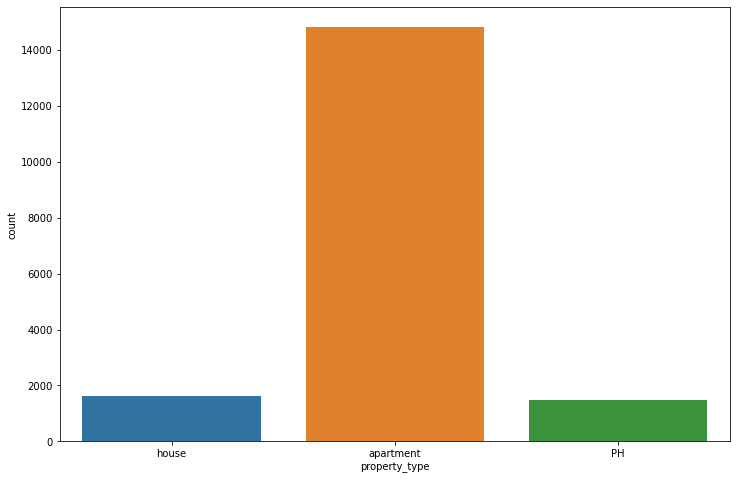

In [8]:
sns.countplot(x=df_filtered.property_type)

## Null Values

I tried discarding those instances that have any null values on key columns for my analysis

The columns that I consider to be key are "surface"(both total and covered), "rooms" and "price"


In [9]:
df_filtered.dropna(subset=['price_aprox_usd','price_usd_per_m2', 'surface_total_in_m2', 'surface_covered_in_m2','rooms'], inplace=True)
#Double - checking
df_filtered.isna().sum()

<ipython-input-9-c2a9e1b216f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['price_aprox_usd','price_usd_per_m2', 'surface_total_in_m2', 'surface_covered_in_m2','rooms'], inplace=True)


created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
floor                      10112
rooms                          0
expenses                    9703
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

Just to go deeper into the analysis, I tried to see how many instances I discarded.

In [10]:
print('Base Instances:', df.shape[0])
print('Instances without null values on key columns:',df_filtered.shape[0])
print('Discarded Instances:', df.shape[0]-df_filtered.shape[0])

Base Instances: 18979
Instances without null values on key columns: 11975
Discarded Instances: 7004


By summing up those attributes with null values, we also got to know that both floor and expenses had a huge amount of empty data. But that is not necessarily wrong.

## Bad Data

I also tried to look for any data errors that might be on the dataset.

The major thing I could find is that some property had a total surface that is lower to covered surface, which of course shouldn't be possible.

In [11]:
wrong_surface_rows=df_filtered[df_filtered.surface_total_in_m2<df_filtered.surface_covered_in_m2]
print('Instances with total surface lower than covered surface are', wrong_surface_rows.shape[0])

Instances with total surface lower than covered surface are 73


To fix this, I altered the values. For these instances, I exchanged surface total for surface covered. 

In [12]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

G:\Anaconda\envs\Prueba\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


I also read that real state agents use standarized coordinates when they dont have the accurate coordinates for the listings. So I tried to look for any repeated coordinate in the remaining listings.

In [13]:
coordinates_count = df_filtered.groupby(['lat', 'lon']).size()
coordinates_count[coordinates_count > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.589546  -58.397364    149
-34.571150  -58.423297    118
-34.562084  -58.456686     77
-34.620928  -58.445874     45
-34.609821  -58.392606     36
-34.597679  -58.443019     31
-34.617719  -58.362056     31
-34.621184  -58.373116     31
-34.610122  -58.405941     31
-34.598647  -58.439018     29
dtype: int64

What i decided to do is to only take into consideration those listings whose coordinates repeat up to 5 times max, in order to be as accurate as possible. 

In [14]:
coordinates_count.name = 'conteo'

df_filtered = df_filtered.join(coordinates_count, on=['lat', 'lon'])

df_filtered = df_filtered[df_filtered.conteo <= 5]

Now I drop attribute `conteo` because it is no longer useful.

In [15]:
df_filtered.drop('conteo', inplace=True, axis=1)

## Analyzing Neighborhoods

### Which neighborhoods has the most houses / apartments

To go deeper into my investigation, i had to know which neightborhoods had the most apartments and houses for sale. 

In [16]:
#% of properties based on the neighborhood
total_properties = df_filtered.groupby('barrio')['property_type'].count().values

In [17]:
percentage_houses_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_properties
percentage_apartments = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_properties

In [18]:
print("Barrios with higher percentage of apartments: \n", percentage_apartments.sort_values()[::-1][:5])
print("Barrios with higher percentage of houses and phs: \n ", percentage_houses_ph.sort_values()[::-1][:5])

Barrios with higher percentage of apartments: 
 barrio
PUERTO MADERO    0.995238
RETIRO           0.992647
SAN NICOLAS      0.989011
RECOLETA         0.987342
BELGRANO         0.952446
Name: property_type, dtype: float64
Barrios with higher percentage of houses and phs: 
  barrio
VERSALLES            0.622222
MATADEROS            0.612500
PARQUE AVELLANEDA    0.560606
VILLA RIACHUELO      0.555556
VILLA REAL           0.500000
Name: property_type, dtype: float64


Only by this first classification, it is possible to understand the difference in construction types in these Barrios. As following:

<AxesSubplot:ylabel='property_type'>

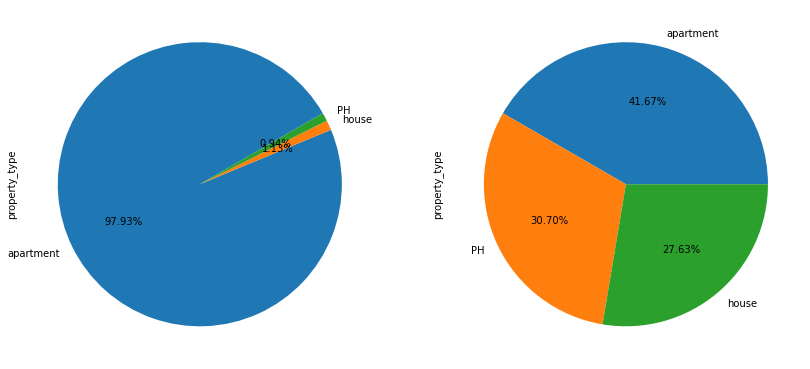

In [19]:
barrios_houses = percentage_houses_ph.sort_values()[::-1][:5].index
barrios_apartments = percentage_apartments.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_apartments)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_houses)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### Cheaper and Expensive Barrios

In order to do some further analysis on the price per square meter, I'll performe some basic statistics on the price distribution throughout the whole dataset and see if I need to correct any extreme values.

In [20]:
print('Min:', df_filtered.price_usd_per_m2.min())
print('Max:',df_filtered.price_usd_per_m2.max())
print('Mean:',df_filtered.price_usd_per_m2.mean())
print('Median:',df_filtered.price_usd_per_m2.median())
print('Std:',df_filtered.price_usd_per_m2.std())

print('First Quantile:' ,df_filtered.price_usd_per_m2.quantile(0.25))
print('Third Quantile:' ,df_filtered.price_usd_per_m2.quantile(0.75))
print('IQR:',df_filtered.price_usd_per_m2.quantile(0.75)-df_filtered.price_usd_per_m2.quantile(0.25))


Min: 0.9583333333333334
Max: 142450.14102564106
Mean: 2785.6551438537
Median: 2588.2352941176473
Std: 1997.7721743224854
First Quantile: 2039.2899147309618
Third Quantile: 3203.982563899346
IQR: 1164.6926491683844


### Removing extreme values

I decided to remove any instance that exceeds the 10th and 90th percentile to get a better sense of the data and drop outliers.

In [21]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

Run statistics again:

In [22]:
# Realizá los calculos en esta celda
print('Min:', df_filtered.price_usd_per_m2.min())
print('Max:',df_filtered.price_usd_per_m2.max())
print('Mean:',df_filtered.price_usd_per_m2.mean())
print('Median:',df_filtered.price_usd_per_m2.median())
print('Std:',df_filtered.price_usd_per_m2.std())

print('First Quantile:' ,df_filtered.price_usd_per_m2.quantile(0.25))
print('Third Quantile:' ,df_filtered.price_usd_per_m2.quantile(0.75))
print('IQR:',df_filtered.price_usd_per_m2.quantile(0.75)-df_filtered.price_usd_per_m2.quantile(0.25))

Min: 1552.9411764705883
Max: 4095.890410958904
Mean: 2632.21256869184
Median: 2588.2352941176473
Std: 607.715138590648
First Quantile: 2150.7936507936506
Third Quantile: 3057.142857142857
IQR: 906.3492063492063


**MUCH BETTER**


Now, I'll use a barplot to chart the price per m2 for each Barrio:

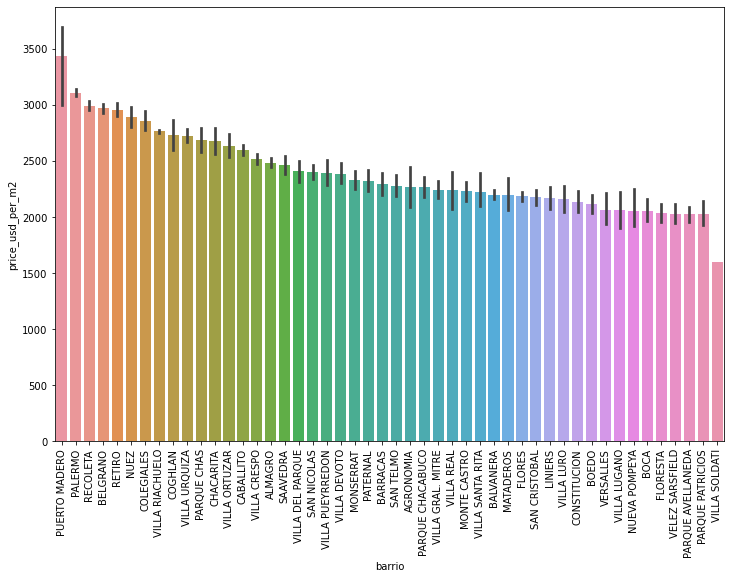

In [40]:
plt.xticks(rotation = 90)
barrio = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrio, data=df_filtered);

In [ ]:
##df_filtered.groupby('barrio').barrio.count()

#### More Expensive Neighborhoods

In [41]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
more_expensive = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
more_expensive

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Cheaper  Neighborhoods

In [42]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
cheaper_neighborhoods = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
cheaper_neighborhoods

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


## Some more charts

Now that I know which are the more expensive and cheaper Neighborhoods, i'll run some charts in order to understand any further difference based on the other attributes. For example:

1) Surface total

2) Rooms.

3) Price per M2

In [43]:
more_expensive = more_expensive.index 
cheaper_neighborhoods = cheaper_neighborhoods.index

G:\Anaconda\envs\Prueba\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\envs\Prueba\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


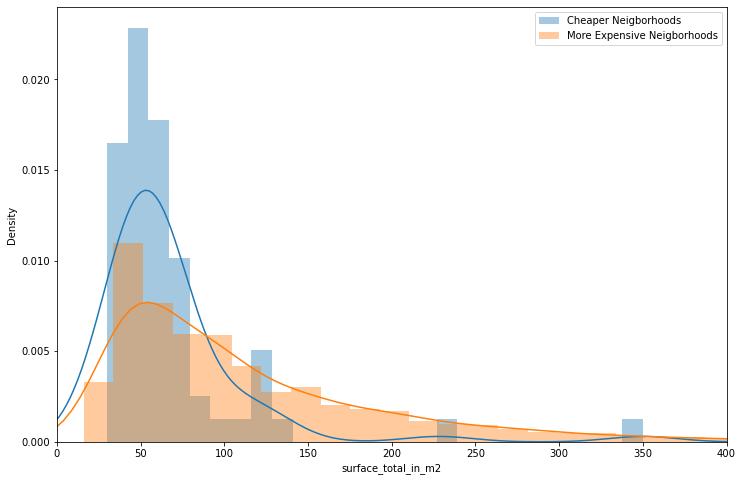

In [65]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(cheaper_neighborhoods)].surface_total_in_m2, label="Cheaper Neigborhoods")
sns.distplot(df_filtered[df_filtered.barrio.isin(more_expensive)].surface_total_in_m2, label="More Expensive Neigborhoods")
g.set_xlim(0, 400)
plt.legend()

G:\Anaconda\envs\Prueba\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\envs\Prueba\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


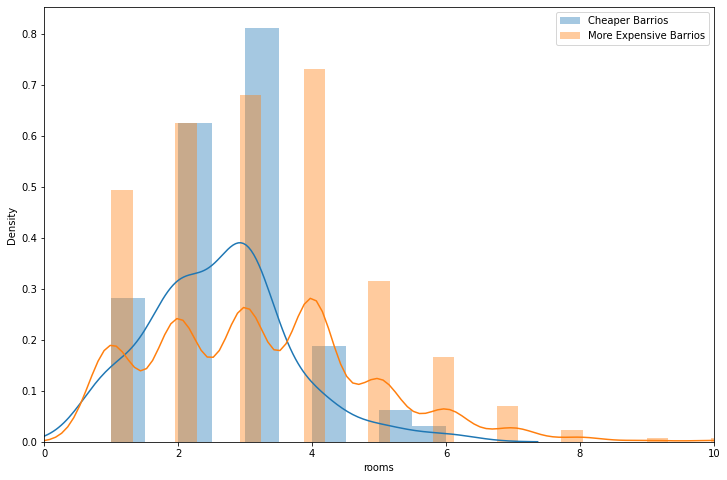

In [45]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(cheaper_neighborhoods)].rooms, label="Cheaper Neigborhoods")
sns.distplot(df_filtered[df_filtered.barrio.isin(more_expensive)].rooms, label="More Expensive Neigborhoods")
g.set_xlim(0, 10)
plt.legend()

G:\Anaconda\envs\Prueba\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\Anaconda\envs\Prueba\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


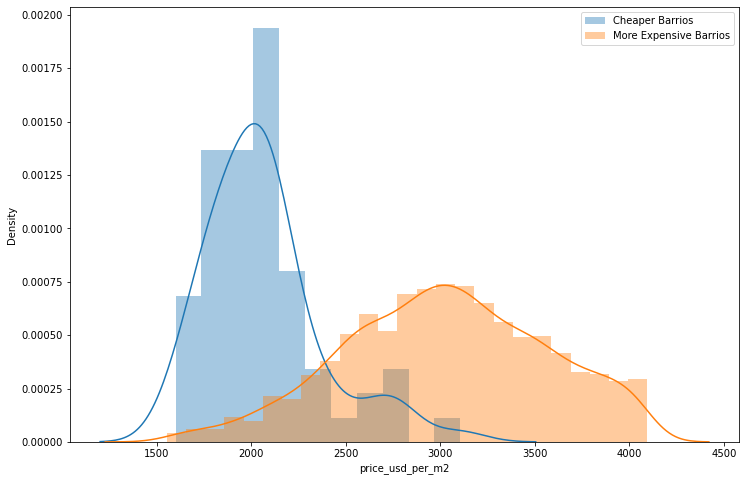

In [46]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(cheaper_neighborhoods)].price_usd_per_m2, label="Cheaper Neigborhoods")
sns.distplot(df_filtered[df_filtered.barrio.isin(more_expensive)].price_usd_per_m2, label="More Expensive Neigborhoods")
plt.legend()
